## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset




In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
merge_table = pd.merge(mouse_metadata, study_results, on= "Mouse ID", how="outer")

organized_merge = merge_table.sort_values(["Tumor Volume (mm3)"], ascending = False)

organized_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1277,o331,Ketapril,Male,24,30,45,78.567014,4
1152,l725,Naftisol,Female,8,26,45,76.668817,3
1354,p189,Ketapril,Male,8,28,45,75.294936,4
1179,m269,Stelasyn,Female,22,28,45,75.123690,1
1571,t724,Naftisol,Female,2,25,45,75.113288,2


## Summary statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Create Groupby
regimen_table = organized_merge.groupby(["Drug Regimen"])

regimen_table.head()


#Calculations
tumor_mean = regimen_table["Tumor Volume (mm3)"].mean()

tumor_median = regimen_table["Tumor Volume (mm3)"].median()

tumor_var = regimen_table["Tumor Volume (mm3)"].var()

tumor_std = regimen_table["Tumor Volume (mm3)"].std()

#print(tumor_mean)
#print(tumor_median)
#print(tumor_var)
#print(tumor_std)

#Build the Dataframe

regimen_analysis = pd.DataFrame({"Tumor mean": tumor_mean, "Tumor Median": tumor_median,
                                "Tumor Var": tumor_var, "Tumor Stdev": tumor_std})

regimen_analysis.head()


,Tumor mean,Tumor Median,Tumor Var,Tumor Stdev
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708


## Bar plots

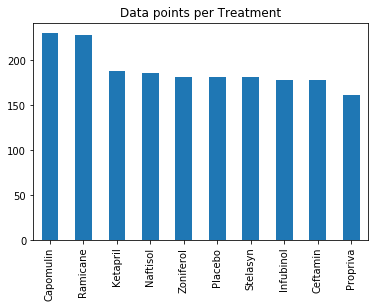

In [25]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#Create filtered table
datapoint_table = organized_merge[["Drug Regimen","Timepoint"]]

#set the Index
datapoint_count = datapoint_table["Drug Regimen"].value_counts()


#Configure plot and ticks

datapoint_count.plot(kind="bar", title ="Data points per Treatment")


([<matplotlib.axis.XTick at 0x14f09a2bd30>,
 <a list of 10 Text xticklabel objects>)

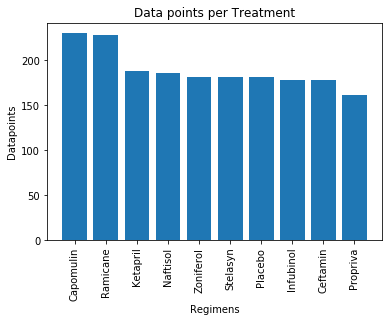

In [55]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

data_count = regimen_table["Timepoint"].count()
data_count = data_count.sort_values( ascending = False)


data_counter = pd.DataFrame({"data points": data_count})

data_counter.head()


# Set x axis and tick locations
regimen_names = data_counter.index.tolist()

x_axis = np.arange(len(regimen_names))

tick_locations = [value for value in x_axis]

 #Create a list indicating where to write x labels and set figure size to adjust for space
plt.title("Data points per Treatment")
plt.xlabel('Regimens')
plt.ylabel('Datapoints')
plt.bar(x_axis, data_counter["data points"])
plt.xticks(tick_locations, regimen_names, rotation="vertical")



## Pie plots

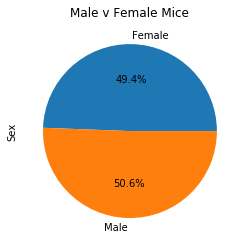

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Create filtered table

gender_table = organized_merge[["Mouse ID","Sex"]]


#set the Index
gender_count = gender_table["Sex"].value_counts(ascending = True)

gender_count

#Configure plot and ticks

graph =gender_count.plot(kind="pie", autopct="%1.1f%%", title="Male v Female Mice")




<function matplotlib.pyplot.show(*args, **kw)>

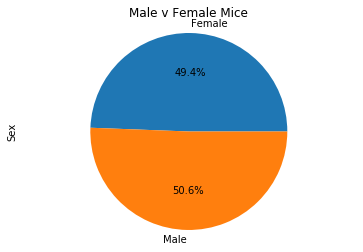

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_table = organized_merge.groupby(["Sex"])

sex_table.head()

#organized_merge = merge_table.sort_values(["Tumor Volume (mm3)"], ascending = False)

#Create Gender Count Data frame
gender_count2 = sex_table["Sex"].count()

gender_counter = pd.DataFrame({"Sex count": gender_count2})

gender_counter.head()


# Set x axis and tick locations
gender_names = gender_counter.index.tolist()


    
plt.pie(gender_count2, labels= gender_names, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Male v Female Mice")
plt.ylabel('Sex')

plt.show

## Quartiles, outliers and boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers.


#Create new dataframe for Capomulin
capo_table= merge_table[merge_table["Drug Regimen"].isin(["Capomulin"])]
capo_table = capo_table.sort_values(["Mouse ID", "Timepoint"], ascending = [True, True])
capo_table = capo_table.drop_duplicates(subset= 'Mouse ID', keep ="last")
capo_table = capo_table.sort_values("Tumor Volume (mm3)", ascending = True)

capo_tumor = capo_table["Tumor Volume (mm3)"]

#Compute quartile calculations
quartile1 = capo_tumor.quantile([.25, .5, .75])

lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
iqr1 = upperq1 - lowerq1
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)

#------------------------------------------------------------------------------------

#Creat new dataframe for Ramicane


rami_table= merge_table[merge_table["Drug Regimen"].isin(["Ramicane"])]
rami_table = rami_table.sort_values(["Mouse ID", "Timepoint"], ascending = [True, True])
rami_table = rami_table.drop_duplicates(subset= 'Mouse ID', keep ="last")
rami_table = rami_table.sort_values("Tumor Volume (mm3)", ascending = True)

rami_tumor = rami_table["Tumor Volume (mm3)"]

#Compute quartile calculations
quartile2 = rami_tumor.quantile([.25, .5, .75])

lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
iqr2 = upperq2 - lowerq2
lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)


#------------------------------------------------------------------------------------

#Creat new dataframe for Infubinol


inf_table= merge_table[merge_table["Drug Regimen"].isin(["Infubinol"])]
inf_table = inf_table.sort_values(["Mouse ID", "Timepoint"], ascending = [True, True])
inf_table = inf_table.drop_duplicates(subset= 'Mouse ID', keep ="last")
inf_table = inf_table.sort_values("Tumor Volume (mm3)", ascending = True)

inf_tumor = inf_table["Tumor Volume (mm3)"]

#Compute quartile calculations
quartile3 = inf_tumor.quantile([.25, .5, .75])

lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
iqr3 = upperq3 - lowerq3
lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)


#------------------------------------------------------------------------------------

#Creat new dataframe for Ceftamin


cef_table= merge_table[merge_table["Drug Regimen"].isin(["Ceftamin"])]
cef_table = cef_table.sort_values(["Mouse ID", "Timepoint"], ascending = [True, True])
cef_table = cef_table.drop_duplicates(subset= 'Mouse ID', keep ="last")
cef_table = cef_table.sort_values("Tumor Volume (mm3)", ascending = True)

cef_tumor = cef_table["Tumor Volume (mm3)"]

#Compute quartile calculations
quartile4 = cef_tumor.quantile([.25, .5, .75])

lowerq4 = quartile4[0.25]
upperq4 = quartile4[0.75]
iqr4 = upperq4 - lowerq4
lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)



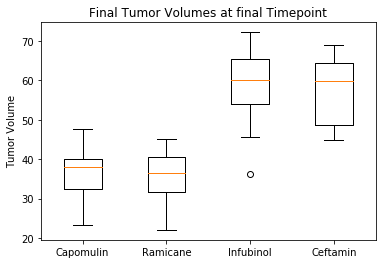

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = []

data.append(capo_tumor)
data.append(rami_tumor)
data.append(inf_tumor)
data.append(cef_tumor)
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes at final Timepoint')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(data, labels =["Capomulin","Ramicane","Infubinol", "Ceftamin"])
plt.show()




## Line and scatter plots

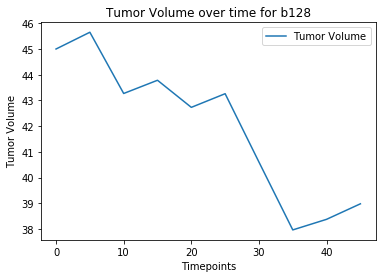

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


mouse = "b128"

#Create new dataframe
mouse_table = merge_table[["Mouse ID","Timepoint","Tumor Volume (mm3)" ]]

mouse_table = mouse_table.sort_values(["Timepoint"], ascending = True)

#Filter for Mouse

mouse_table2 = mouse_table[(mouse_table["Mouse ID"]== mouse)]

mouse_table2


mouse_tumor, = plt.plot(mouse_table2["Timepoint"], mouse_table2["Tumor Volume (mm3)"], label ="Tumor Volume" )

plt.legend(handles=[mouse_tumor], loc="best")

plt.title("Tumor Volume over time for b128")

plt.ylabel("Tumor Volume")

plt.xlabel("Timepoints")

plt.show()




<function matplotlib.pyplot.show(*args, **kw)>

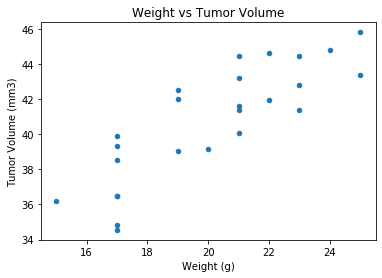

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



Capomulin = merge_table[(merge_table["Drug Regimen"] == "Capomulin")]
Capomulin.head()
Capomulin = Capomulin[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
Capomulin = Capomulin.groupby("Mouse ID").mean()
Capomulin = Capomulin.reset_index()
Capomulin.head(20)

Capomulin.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume")
plt.show

In [15]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#compute the Pearson correlation coefficient between weight and tumors
weight = Capomulin.iloc[:, 1]
tumor_vol = Capomulin.iloc[:, 2]

correlation = st.pearsonr(weight, tumor_vol)

print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


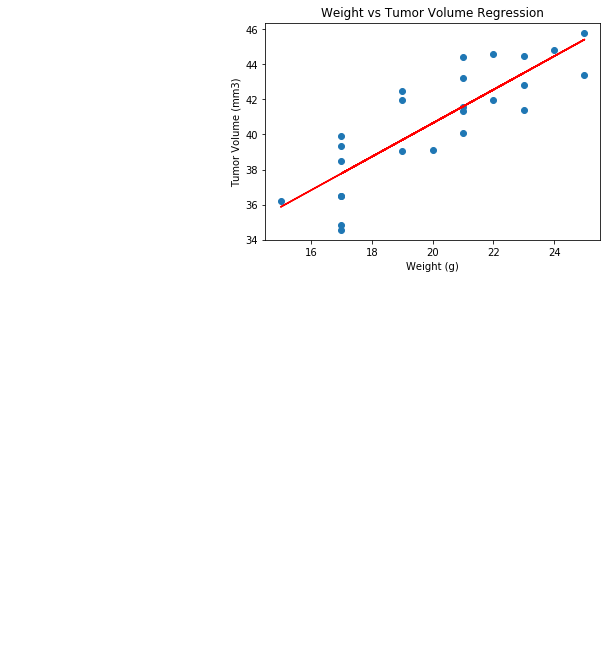

In [20]:
#Create Linear Regression
x_values = Capomulin['Weight (g)']
y_values = Capomulin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Weight vs Tumor Volume Regression")
plt.show()